<a href="https://colab.research.google.com/github/NDDV/Picture-Detected-with-Simple-CNN/blob/main/Ph%C3%A2n_lo%E1%BA%A1i_%E1%BA%A3nh_simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(len(x_train),"\n",len(y_train),"\n",len(x_test),"\n",len(y_test))

170508288/170498071 [==============================] - 11s 0us/step
50000 
 50000 
 10000 
 10000


In [ ]:
X_val, Y_val = x_train[40000:50000], y_train[40000:50000]
X_train, Y_train = x_train[:40000], y_train[:40000]
print(len(X_train),"\n",len(Y_train),"\n",len(X_val),"\n",len(Y_val))

40000 
 40000 
 10000 
 10000


In [ ]:
print(X_train.shape)

(40000, 32, 32, 3)


In [ ]:
X_val.shape

(10000, 32, 32, 3)

In [ ]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
Y_train_one_hot_encoding = keras.utils.to_categorical(Y_train,
                                                      num_classes=len(np.unique(Y_train))
                                                      )
Y_val_one_hot_encoding = keras.utils.to_categorical(Y_val,
                                                    num_classes=len(np.unique(Y_val))
                                                    )
y_test_one_hot_encoding = keras.utils.to_categorical(y_test,
                                                    num_classes=len(np.unique(y_test))
                                                    )

In [ ]:
print('Dữ liệu y ban đầu ', Y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train_one_hot_encoding[0])

Dữ liệu y ban đầu  [6]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
input_shape = X_train.shape[1:]
output_node = len(np.unique(Y_train))

In [ ]:
model = keras.Sequential(name="PLA_Simple_CNN")

# Thêm Convolutional layer
# dùng hàm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(keras.layers.Conv2D(64,(3, 3),activation='ReLU',input_shape=input_shape))

for i in range(2):
  # Thêm Convolutional layer
  model.add(keras.layers.Conv2D(64,(3, 3),activation='ReLU'))
  # Thêm Max pooling layer
  model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.3))

# Flatten layer chuyển từ tensor sang vector
model.add(keras.layers.Flatten())

# Thêm Fully Connected layer
model.add(keras.layers.Dense(512,activation='ReLU'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(keras.layers.Dense(output_node, activation='softmax'))

#Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "PLA_Simple_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_69 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 conv2d_70 (Conv2D)          (None, 7, 7, 64)       

In [ ]:
history = model.fit(X_train, Y_train_one_hot_encoding, validation_data=(X_val, Y_val_one_hot_encoding),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8683 - accuracy: 0.6972 - val_loss: 0.7393 - val_accuracy: 0.7444
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8472 - accuracy: 0.7030 - val_loss: 0.7726 - val_accuracy: 0.7358
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8270 - accuracy: 0.7093 - val_loss: 0.7421 - val_accuracy: 0.7443
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8192 - accuracy: 0.7158 - val_loss: 0.7489 - val_accuracy: 0.7401
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8112 - accuracy: 0.7164 - val_loss: 0.7515 - val_accuracy: 0.7379
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7883 - accuracy: 0.7242 - val_loss: 0.7281 - val_accuracy: 0.7479
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7817 - accuracy: 0.7273 - val_loss: 0.6973 - val_accuracy:

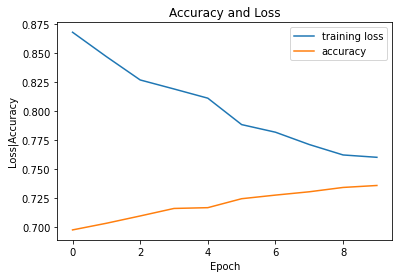

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), history.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), history.history['accuracy'], label='accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(x_test, y_test_one_hot_encoding, verbose = 0)
print(score)

[0.7531647682189941, 0.7398999929428101]


Giá trị dự đoán:  3


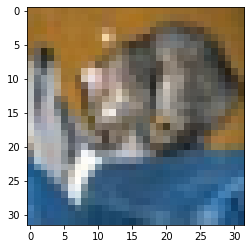

In [ ]:
a = 0
plt.imshow(x_test[a], cmap='gray')
y_predict = model.predict(x_test[a].reshape(1,32,32,3))
print('Giá trị dự đoán: ', np.argmax(y_predict))